### Operações de fraude em cartão de crédito

Nesse Dataset analisaremos as transações de cartão realizadas pelos seus titulares na Europa em setembro de 2013. Os dados são compostos por transações de dois dias nesse mês.

Dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud


Observações:
- O Dataset está extremamente desbalanceado, com uma pequena porcentagem, 0,172% sendo representada por fraudes e o restante por operações normais.
- As variáveis V1,V2,...,V28 são todas numéricas, devido a técnica de PCA (principal component analysis) aplicada para diminuir a dimensionalidade do problema, e assim evitar Overfitting (multicolinearidade, menos parâmetros para estimar).
- A técnica anterior somado ao fator confidenciabilidade dos dados bancários implicaram em uma ausência do significado de cada feature.
- o Target Class tem como resultado 1 - Fraude, 0 - Operação normal.


Objetivos:

- Aplicaremos uma análise exploratória para entender as variáveis presentes no dataset.
- Pré-processamento dos dados.
- Aplicação de modelos de Machine Learning.
- Uso de métricas para avaliar a performance do modelo.

### 1. Análise exploratória 

Etapas:

- Detalhar o Dataset
- Identificar os valores missing e fazer o devido tratamento
- Identificar os valores duplicados e fazer o devido tratamento
- Avaliar a correlação entre as variáveis e o Target
- Avaliar a correlação entre as variáveis


**Observe: Devido ao fato das variáveis não poderem ser identificadas, uma análise mais a fundo de cada uma torna-se impraticável (não teremos mais conclusões). Assim optamos por entender a relação entre elas.**

### 1.1 Análise inicial:

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("creditcard.csv")

In [2]:
#Exibir um resumo Dataset

df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [78]:
# Entender as características dos dados.
# Como dito todos as features construídas pelo PCA possuem valores numéricos.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [79]:
# Não existem valores missing, logo não será necessário fazer imput de dados, seja por média, mediana, etc.

df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [80]:
#Dados duplicados

df.duplicated().sum()

1081

In [81]:
df = df.drop_duplicates()

In [82]:
df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

Text(0, 0.5, 'Count')

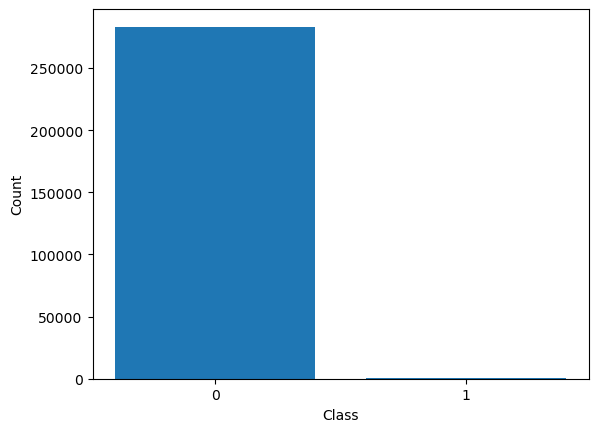

In [83]:
# Como dito anteriormente o Dataset está extremanente desbalanceado.

class_counts = df['Class'].value_counts()
plt.bar(class_counts.index, class_counts.values)
plt.xticks(class_counts.index)
plt.xlabel('Class')
plt.ylabel('Count')

In [84]:
# Avaliar correlação entre a feature e o Target
# Não parece ter uma correlação forte com nenhuma das features.

df.corr()['Class'].sort_values(ascending = False)

Class     1.000000
V11       0.149067
V4        0.129326
V2        0.084624
V19       0.033631
V8        0.033068
V21       0.026357
V27       0.021892
V20       0.021486
V28       0.009682
Amount    0.005777
V22       0.004887
V26       0.004265
V25       0.003202
V15      -0.003300
V13      -0.003897
V23      -0.006333
V24      -0.007210
Time     -0.012359
V6       -0.043915
V5       -0.087812
V9       -0.094021
V1       -0.094486
V18      -0.105340
V7       -0.172347
V3       -0.182322
V16      -0.187186
V10      -0.206971
V12      -0.250711
V14      -0.293375
V17      -0.313498
Name: Class, dtype: float64

- **Não parece ter multicolinearidade entre as features (V1 - V28)**
- **Isso é explicado pela técnica de PCA aplicada que evita isso, e consequentemente o Overfitting.**

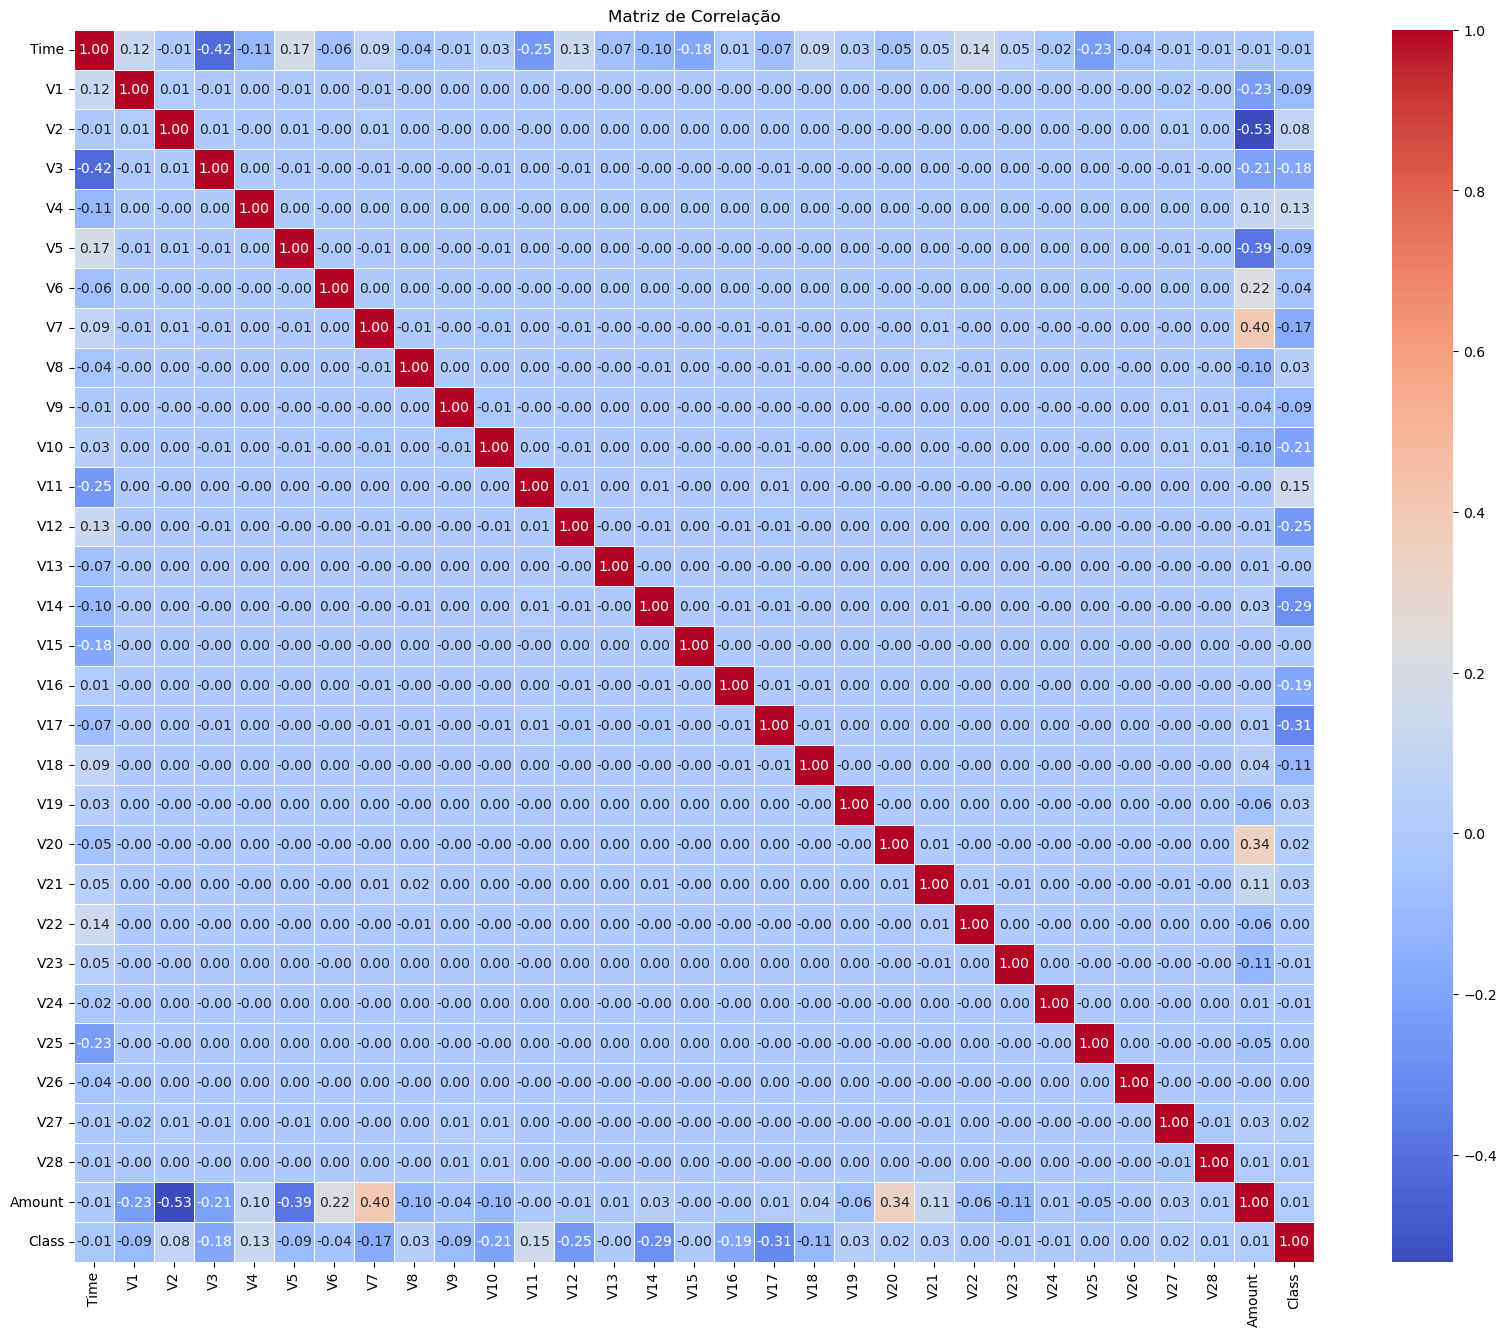

In [85]:
matriz_correlacao = df.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

In [86]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


### 1.2. Teste de hipótese

**1°) Teste de normalidade**

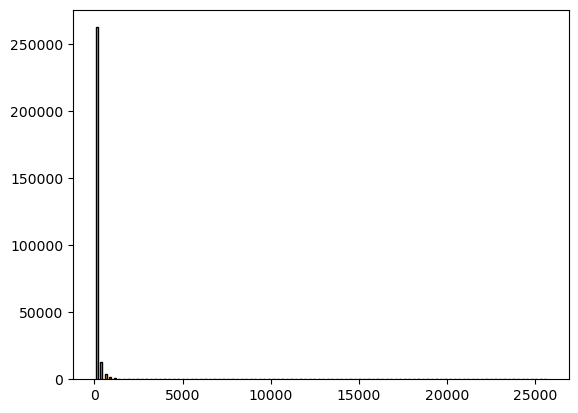

In [8]:
plt.hist(df['Amount'],color='orange',bins=100,edgecolor='black',rwidth=0.5);

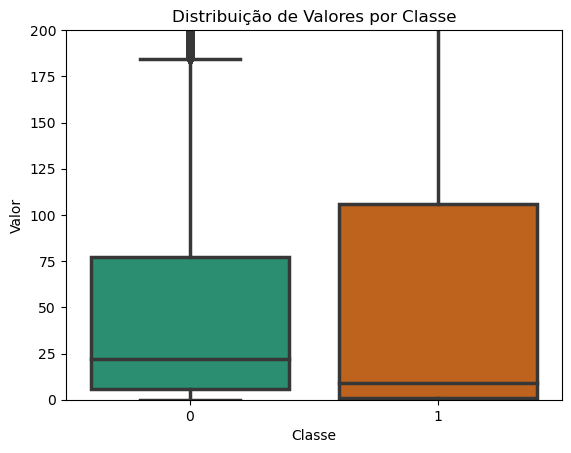

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crie o gráfico de boxplot
sns.boxplot(x='Class', y='Amount', data=df, linewidth=2.5, palette='Dark2')

# Redimensione o eixo y para um intervalo específico, como (0, 1000)
plt.ylim(0, 200)

# Adicione um título e rótulos aos eixos
plt.title('Distribuição de Valores por Classe')
plt.xlabel('Classe')
plt.ylabel('Valor')

# Exiba o gráfico
plt.show()

- A partir dos boxplot e do histograma fica claro que os dados não possuem uma distribuição normal (são assimétricos a direita). Ou seja, uma pequena quantidade de dados com valores extremamente elevados, os quais acabam por deslocar a média para valores mais altos do que a mediana.

- Uma imagem é exibida abaixo para ilustrar isso, além disso, devido a ausência de normalidade não podemos aplicar testes paramétricos. O ideial seria usar não paramétricos.


#### Imagem distribuição Assimétrica a Direita


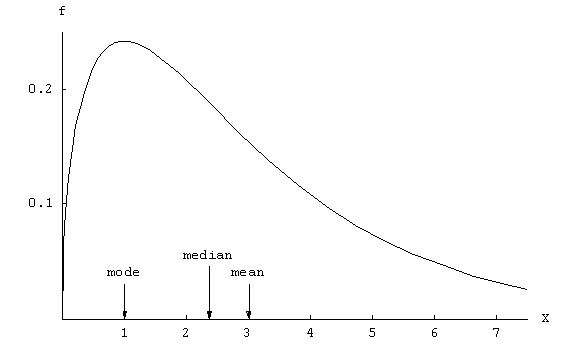


               

**2°) Hipóteses:**

- Hipótese Nula (H0): A média das fraudes (Classe "fraude") é igual à média das operações normais (Classe "não fraude").
- Hipótese Alternativa (H1): A média das fraudes (Classe "fraude") é superior à média das operações normais (Classe "não fraude").

### 2. Pré-processamento dos dados

- Como esse dataset tem o aspecto educativo, não temos dados faltantes, o que seria um dos focos de tratamento nessa etapa.
- Avaliar Outiliers e fazer tratamento
- Fazer o Scaling das variáveis. Tratamento essencial para utilizar alguns modelos. (Nesse caso não será necessário, pois os dados passsaram pela técnica PCA).
- Transformar variáveis categóricas em numéricas (One-hot encoding, Target Enconding, Dummy). Não foi necessário fazer essa etapa, os valores são numéricos.


**Ou seja, essa etapa não será necessária nesse caso.**

### 3. Modelos de Machine Learning

### 3.1 Divisão:

In [89]:
# Separação das variáveis explicativas e a variável target

X = df.drop(['Time', 'Class'], axis = 1)
y = df['Class']

<Axes: ylabel='count'>

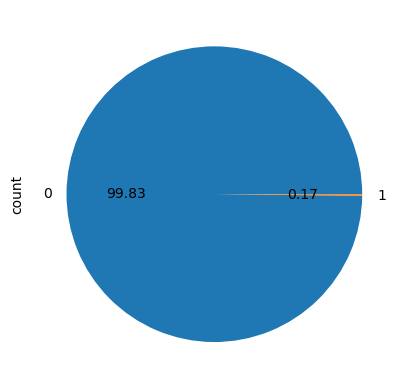

In [90]:
y.value_counts().plot.pie(autopct = '%.2f')

**Como será necessario ajustar os hiperparâmetros do modelo, o ideal é criar uma base extra, dedidcada apenas para essa função, assim:**

- Treino (para treinar o modelo),
- Validação (para encontrar o melhor hiperparâmetro) e
- Teste (para de fato verificar o quanto seu modelo pode ser generalizado).

In [91]:
from sklearn.model_selection import train_test_split

**Separação das bases em 70% Treino, 15% Validação e 15% Teste**

Além disso foi adicionado o parâmetro stratify para manter a proporção dos dados em todas as divisões. Isso ajuda a evitar um desequilíbrio significativo entre as classes nos conjuntos de treinamento e teste, o que é importante para a validação adequada do desempenho do modelo de aprendizado de máquina.

In [92]:
train_ratio = 0.70
valid_ratio = 0.15
test_ratio = 0.15

In [93]:
# Passo 1) Particionamos a base em Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=test_ratio,
                                                    random_state=50, stratify=y)

In [94]:
from sklearn.model_selection import train_test_split

# Dividir o conjunto de treinamento em treinamento (85%) e validação (15%)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=50, stratify=y_train)

In [95]:
lista = ['Treino', 'Validação', 'Teste']
lista1 = [X_train, X_valid, X_test]

for i in range(len(lista)):
    df = lista1[i]
    print(f'Os dados de {lista[i]} têm {df.shape[0]} linhas e {df.shape[1]} colunas.')

Os dados de Treino têm 204991 linhas e 29 colunas.
Os dados de Validação têm 36176 linhas e 29 colunas.
Os dados de Teste têm 42559 linhas e 29 colunas.


In [96]:
datasets = [y_train, y_valid, y_test]
dataset_names = ['Treinamento', 'Validação', 'Teste']

# Loop para calcular a porcentagem de cada classe em cada conjunto de dados
for i, dataset in enumerate(datasets):
    class_percentages = (dataset.value_counts() / dataset.shape[0]) * 100
    print(f"Porcentagem de classes no conjunto de {dataset_names[i]}:")
    print(class_percentages)
    print()

Porcentagem de classes no conjunto de Treinamento:
Class
0    99.833163
1     0.166837
Name: count, dtype: float64

Porcentagem de classes no conjunto de Validação:
Class
0    99.834144
1     0.165856
Name: count, dtype: float64

Porcentagem de classes no conjunto de Teste:
Class
0    99.833173
1     0.166827
Name: count, dtype: float64



### 3.2. Treinamento do modelo:

**Pipelines são muito importantes para organizar o Pré-processamento e a junção ao modelo.**

In [97]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, log_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

#Classificadores

classifiers_list = [
   LogisticRegression(max_iter=1000),
    DecisionTreeClassifier(),
]

In [98]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, confusion_matrix, f1_score

for classifier in classifiers_list:
    pipe = Pipeline(steps=[("classifier", classifier)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)  # Calcular previsões para o modelo atual
    print(classifier)
    
    # Métricas de Desempenho
    
    print('Acurácia:', accuracy_score(y_test, y_pred))
    print('F1-Score:', f1_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred))
    print('Recall:', recall_score(y_test, y_pred))
    print('')
    print('Matriz de Confusão:\n', confusion_matrix(y_test, y_pred))
    print('')

LogisticRegression(max_iter=1000)
Acurácia: 0.9990131347071125
F1-Score: 0.6557377049180328
Precision: 0.7843137254901961
Recall: 0.5633802816901409

Matriz de Confusão:
 [[42477    11]
 [   31    40]]

DecisionTreeClassifier()
Acurácia: 0.9991306186705514
F1-Score: 0.7338129496402879
Precision: 0.75
Recall: 0.7183098591549296

Matriz de Confusão:
 [[42471    17]
 [   20    51]]



**Nesse caso foi possível observar que o modelo "Árvore de decisão" teve uma melhor performance, nesse caso optaremos por otimizar seus parâmetros. A conclusão sobre esses resultados serão exibidos futuramente.**

**Nosso modelo após o ajuste de hiperparâmetros apresentou uma melhora nas métricas de avaliação.**

### 3.4. Balancear Dataset

### Observação:

E se quisermos melhorar ainda mais a performance? Uma opção seria balancear nossos dados (Target).

Existem dois tipos de classes:
- majoritária (que possui mais registros) - 0 - Sem fraude
- minoritária (que possui menos registros) - 1 - Com fraude

Assim temos duas opções: 
- balancear o dataset diminuindo os registros da classe majoritária (Oversampling)
- aumentar os registros da classe minoritária. (Under-sampling)

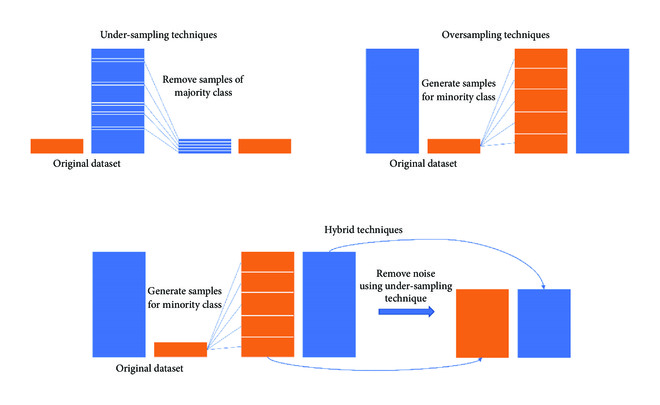

### 3.4.1. Undersampling:

In [99]:
#Instalar a biblioteca

#!pip install -U imbalanced-learn

In [100]:
# Importando o RandomUnderSampler do imblearn
from imblearn.under_sampling import RandomUnderSampler

In [101]:
# Definindo o RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
# Aplicando para X e y
X_res, y_res = rus.fit_resample(X_train, y_train)

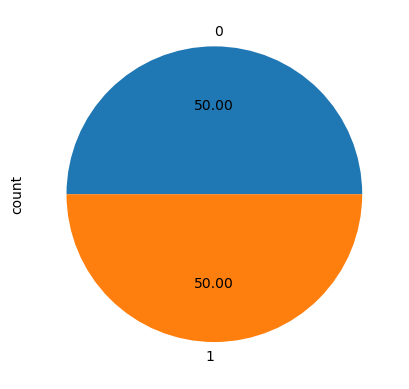

In [102]:
# Visualizando graficamente
y_res.value_counts().plot.pie(autopct='%.2f');

In [103]:
# Contando os valores em cada classe
y_res.value_counts()

Class
0    342
1    342
Name: count, dtype: int64

In [109]:
pipe2 = Pipeline(steps=[("classifier", classifier)])
pipe2.fit(X_res, y_res)
y_pred2 = pipe2.predict(X_test)  # Calcular previsões para o modelo atual


print('Acurácia:', accuracy_score(y_test, y_pred2))
print('F1-Score:', f1_score(y_test, y_pred2))
print('Precision:', precision_score(y_test, y_pred2))
print('Recall:', recall_score(y_test, y_pred2))
print('')
print('Matriz de Confusão:\n', confusion_matrix(y_test, y_pred2))

Acurácia: 0.8953452853685472
F1-Score: 0.027510917030567683
Precision: 0.013972055888223553
Recall: 0.8873239436619719

Matriz de Confusão:
 [[38042  4446]
 [    8    63]]


O Dataset apresentou uma performance bem superior na métrica Recall, piorando nas restantes (Trade-off)

### 3.4.2. Oversampling:

In [111]:
# Importando o RandomOverSampler do imblearn
from imblearn.over_sampling import RandomOverSampler

# Instanciando
ros = RandomOverSampler(random_state=42)

# Aplicando para X e y
X_res2, y_res2 = ros.fit_resample(X_train, y_train)

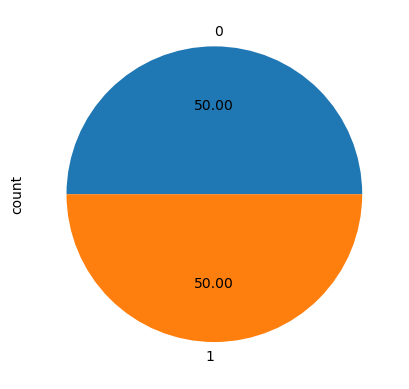

In [112]:
# Visualizando graficamente
y_res2.value_counts().plot.pie(autopct='%.2f');

In [114]:
# Contando os valores em cada classe
y_res2.value_counts()

Class
0    204649
1    204649
Name: count, dtype: int64

In [115]:
pipe3 = Pipeline(steps=[("classifier", classifier)])
pipe3.fit(X_res2, y_res2)
y_pred3 = pipe2.predict(X_test)  # Calcular previsões para o modelo atual


print('Acurácia:', accuracy_score(y_test, y_pred3))
print('F1-Score:', f1_score(y_test, y_pred3))
print('Precision:', precision_score(y_test, y_pred3))
print('Recall:', recall_score(y_test, y_pred3))
print('')
print('Matriz de Confusão:\n', confusion_matrix(y_test, y_pred3))

Acurácia: 0.9991306186705514
F1-Score: 0.725925925925926
Precision: 0.765625
Recall: 0.6901408450704225

Matriz de Confusão:
 [[42473    15]
 [   22    49]]


**No caso de Undersampling obtivemos um resultado pior.**

### Conclusão:


- **Optaremos pelo medelo de árvore de decisão com Under-sampling, pois apresentou o melhor resultado das métricas desejadas, uma explicação é exibida abaixo.**

- **O melhor modelo é aquele que apresenta maior Recall (True Positive Rate), isso pois ela mede a proporção de fraudes que são corretamente identificadas como fraudes. Uma métrica alta indica que um maior número de fraudes sejam detectadas.**

- **A acurácia performou muito bem nos dados balanceados, porém necessitamos de outras métricas para ter uma conclusão geral.**

- **O Precision avalia a proporção de transações identificadas como fraudes que são realmente fraudes. Quanto maior, menor a proporção de Falsos positivos, ou seja, que foram classificados como fraudes mas não são**

- **Assim é melhor buscar um trade-off, uma vez que preferimos ter mais casos de falsos positivos (Classificar como fraude quando não é) do que falsos negativos (não classificar quando é fraude).**

- **Logo, optamos pelo modelo de Under-Sampling.**

### 3.5. Ajuste e Validação do Modelo:

- Nessa etapa será feito o ajuste dos hiperparâmetros do modelo por meio do GridSearch, nele são feitas combinações de hiperparâmetros visando buscar a de melhor performance.

In [116]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

pipeline = Pipeline(steps=[('classifier', DecisionTreeClassifier())
])

In [120]:
# Treinar o modelo no conjunto de treinamento balanceado (Under-sampling)

pipeline.fit(X_res, y_res)

Pipeline(steps=[('classifier', DecisionTreeClassifier())])

In [121]:
from sklearn.model_selection import GridSearchCV  # Para ajuste de hiperparâmetros

#hiperparâmetros a serem ajustados

param_grid = {
    'max_depth': np.arange(1, 20, 4),  # Varie de 1 a 20
    'min_samples_split': np.arange(2, 11, 3),  # Varie de 2 a 10
    'min_samples_leaf': np.arange(1, 11, 3),  # Varie de 1 a 10
    'criterion': ['gini', 'entropy']
}

#Criar objeto GridSearchCV

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)

#Usar os dados de validação

grid_search.fit(X_valid, y_valid)

#Obter melhores parâmetros

best_model = grid_search.best_estimator_

#Tempo de execução

import time

start_time = time.time()
grid_search.fit(X_valid, y_valid)
end_time = time.time()

execution_time = end_time - start_time
print(f"Tempo de execução: {execution_time} segundos")

Tempo de execução: 654.3224835395813 segundos


In [123]:
best_model

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=5)

### 3.6. Treinamento do Modelo Final no conjunto de treinamento completo com Undersampling

In [132]:
pipe4 = best_model.fit(X_res, y_res)
pipe4

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=5)

### 3.7. Avaliação do modelo:

In [136]:
# Avalie o melhor modelo no conjunto de teste
y_pred4 = pipe4.predict(X_test)

print('Acurácia:', accuracy_score(y_test, y_pred4))
print('F1-Score:', f1_score(y_test, y_pred4))
print('Precision:', precision_score(y_test, y_pred4))
print('Recall:', recall_score(y_test, y_pred4))
print('')
print('Matriz de Confusão:\n', confusion_matrix(y_test, y_pred4))

Acurácia: 0.9478371202330882
F1-Score: 0.052901023890784986
Precision: 0.027276726792784867
Recall: 0.8732394366197183

Matriz de Confusão:
 [[40277  2211]
 [    9    62]]


- Nosso ajuste resultou em piores resultados de métricas, isso devido a alguma combinação que não foi adotada.

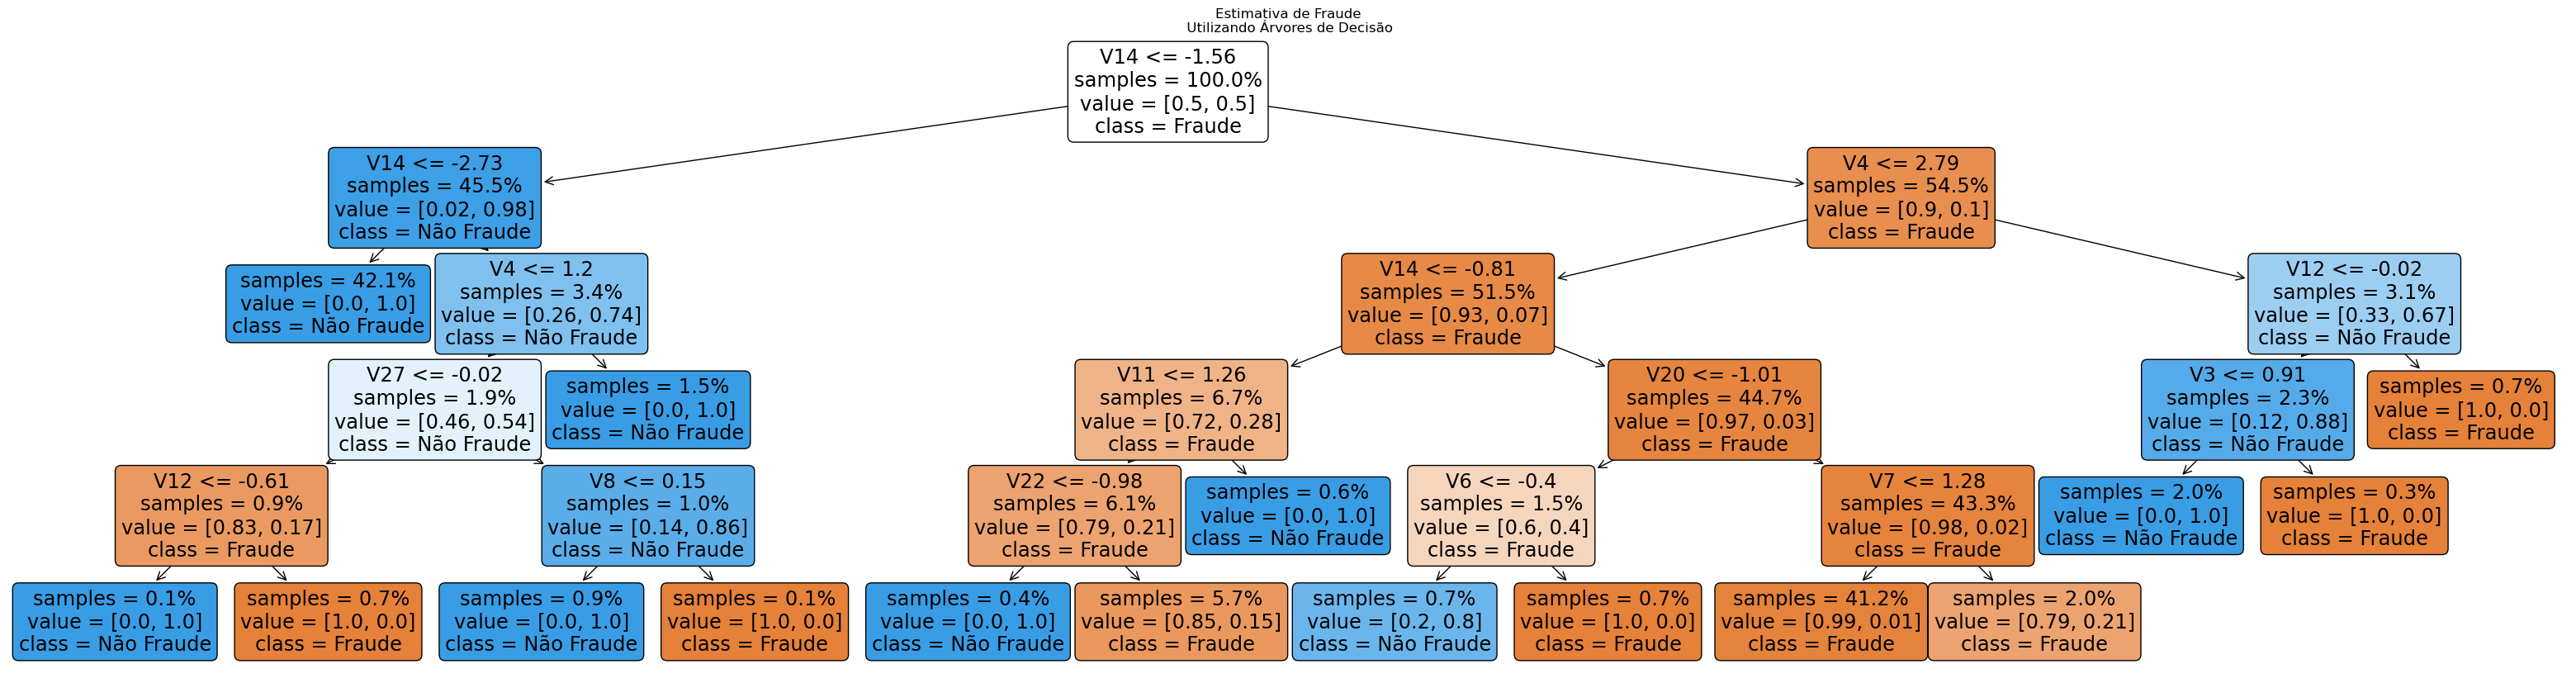

In [135]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Suponha que "pipe4" seja o seu modelo DecisionTreeClassifier

# Defina as características e nomes de classe
features = list(X.columns)
class_names = ['Fraude', 'Não Fraude']

# Crie uma figura
fig = plt.figure(figsize=(40, 10))

# Plote a árvore diretamente, sem usar named_steps
plot_tree(pipe4, 
          feature_names=features, 
          class_names=class_names, 
          rounded=True, 
          precision=2, 
          proportion=True, 
          impurity=False, 
          filled=True)

# Defina um título
plt.title("Estimativa de Fraude\n Utilizando Árvores de Decisão")
b
# Exiba a árvore
plt.show()



**Segue uma imagem da árvore de decisão com ajuste de hiperparâmetros no Undersampling. Nela foi utilizada entropia para fazer as divisões nas árvores e obter o maior nível de pureza possível. Para aprofundar o algoritmo de otimização utilizado nesse caso é o CART.**